In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/revops_executive_training_6_months.csv")

In [3]:
df.head()

,month,traffic_investment_brl,linkedin_spend,google_spend,instagram_spend,leads_generated,mqls,sqls,meetings_scheduled,deals_closed,revenue_brl,entry_product_sales,mid_product_sales,premium_product_sales
0,2025-07,2100,700,900,500,180,90,55,40,12,48000,6,4,2
1,2025-08,2300,800,1000,500,200,100,60,45,14,56000,7,5,2
2,2025-09,2200,750,950,500,195,95,58,42,13,52000,6,5,2
3,2025-10,2500,900,1100,500,230,115,70,50,18,76000,8,7,3
4,2025-11,2400,850,1050,500,220,110,68,48,16,68000,7,6,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   6 non-null      object
 1   traffic_investment_brl  6 non-null      int64 
 2   linkedin_spend          6 non-null      int64 
 3   google_spend            6 non-null      int64 
 4   instagram_spend         6 non-null      int64 
 5   leads_generated         6 non-null      int64 
 6   mqls                    6 non-null      int64 
 7   sqls                    6 non-null      int64 
 8   meetings_scheduled      6 non-null      int64 
 9   deals_closed            6 non-null      int64 
 10  revenue_brl             6 non-null      int64 
 11  entry_product_sales     6 non-null      int64 
 12  mid_product_sales       6 non-null      int64 
 13  premium_product_sales   6 non-null      int64 
dtypes: int64(13), object(1)
memory usage: 804.0+ bytes


In [5]:
df.describe()

,traffic_investment_brl,linkedin_spend,google_spend,instagram_spend,leads_generated,mqls,sqls,meetings_scheduled,deals_closed,revenue_brl,entry_product_sales,mid_product_sales,premium_product_sales
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2291.666667,796.666667,996.666667,498.333333,205.000000,102.000000,62.166667,44.833333,14.666667,60333.333333,6.833333,5.333333,2.500000
std,142.886902,71.180522,71.180522,4.082483,17.888544,9.273618,5.810909,3.710346,2.160247,10462.631919,0.752773,1.032796,0.547723
min,2100.000000,700.000000,900.000000,490.000000,180.000000,90.000000,55.000000,40.000000,12.000000,48000.000000,6.000000,4.000000,2.000000
25%,2212.500000,757.500000,957.500000,500.000000,196.250000,96.250000,58.500000,42.500000,13.250000,53000.000000,6.250000,5.000000,2.000000
50%,2275.000000,790.000000,990.000000,500.000000,202.500000,101.000000,61.000000,44.500000,14.500000,59000.000000,7.000000,5.000000,2.500000
75%,2375.000000,837.500000,1037.500000,500.000000,216.250000,108.000000,66.500000,47.250000,15.750000,66500.000000,7.000000,5.750000,3.000000
max,2500.000000,900.000000,1100.000000,500.000000,230.000000,115.000000,70.000000,50.000000,18.000000,76000.000000,8.000000,7.000000,3.000000


In [6]:
# Taxas de conversão do funil
df["lead_to_mql"] = df["mqls"] / df["leads_generated"]
df["mql_to_sql"] = df["sqls"] / df["mqls"]
df["sql_to_meeting"] = df["meetings_scheduled"] / df["sqls"]
df["meeting_to_sale"] = df["deals_closed"] / df["meetings_scheduled"]

df[[
    "month",
    "lead_to_mql",
    "mql_to_sql",
    "sql_to_meeting",
    "meeting_to_sale"
]]

,month,lead_to_mql,mql_to_sql,sql_to_meeting,meeting_to_sale
0,2025-07,0.500000,0.611111,0.727273,0.300000
1,2025-08,0.500000,0.600000,0.750000,0.311111
2,2025-09,0.487179,0.610526,0.724138,0.309524
3,2025-10,0.500000,0.608696,0.714286,0.360000
4,2025-11,0.500000,0.618182,0.705882,0.333333
5,2025-12,0.497561,0.607843,0.709677,0.340909


In [7]:
# medias do funil
df[[
    "lead_to_mql",
    "mql_to_sql",
    "sql_to_meeting",
    "meeting_to_sale"
]].mean()


lead_to_mql        0.497457
mql_to_sql         0.609393
sql_to_meeting     0.721876
meeting_to_sale    0.325813
dtype: float64

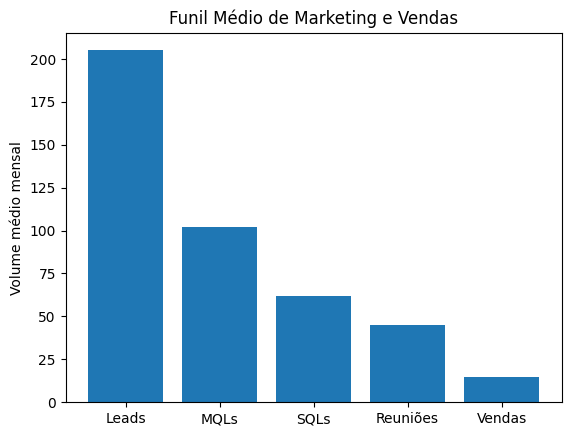

In [8]:
# visualização do funil
funnel = {
    "Leads": df["leads_generated"].mean(),
    "MQLs": df["mqls"].mean(),
    "SQLs": df["sqls"].mean(),
    "Reuniões": df["meetings_scheduled"].mean(),
    "Vendas": df["deals_closed"].mean()
}

plt.figure()
plt.bar(funnel.keys(), funnel.values())
plt.title("Funil Médio de Marketing e Vendas")
plt.ylabel("Volume médio mensal")
plt.show()

In [9]:
df.head()

,month,traffic_investment_brl,linkedin_spend,google_spend,instagram_spend,leads_generated,mqls,sqls,meetings_scheduled,deals_closed,revenue_brl,entry_product_sales,mid_product_sales,premium_product_sales,lead_to_mql,mql_to_sql,sql_to_meeting,meeting_to_sale
0,2025-07,2100,700,900,500,180,90,55,40,12,48000,6,4,2,0.500000,0.611111,0.727273,0.300000
1,2025-08,2300,800,1000,500,200,100,60,45,14,56000,7,5,2,0.500000,0.600000,0.750000,0.311111
2,2025-09,2200,750,950,500,195,95,58,42,13,52000,6,5,2,0.487179,0.610526,0.724138,0.309524
3,2025-10,2500,900,1100,500,230,115,70,50,18,76000,8,7,3,0.500000,0.608696,0.714286,0.360000
4,2025-11,2400,850,1050,500,220,110,68,48,16,68000,7,6,3,0.500000,0.618182,0.705882,0.333333


In [ ]:
# Receita gerada no período analisado (úlmoss 6 meses)
total_revenue = df["revenue_brl"].sum()
total_revenue

np.int64(362000)

A empresa gerou uma receita total de R$ 362.000 durante o período analisado.

In [ ]:
# Receita mensal
monthly_revenue = df[["month", "revenue_brl"]]
monthly_revenue

,month,revenue_brl
0,2025-07,48000
1,2025-08,56000
2,2025-09,52000
3,2025-10,76000
4,2025-11,68000
5,2025-12,62000


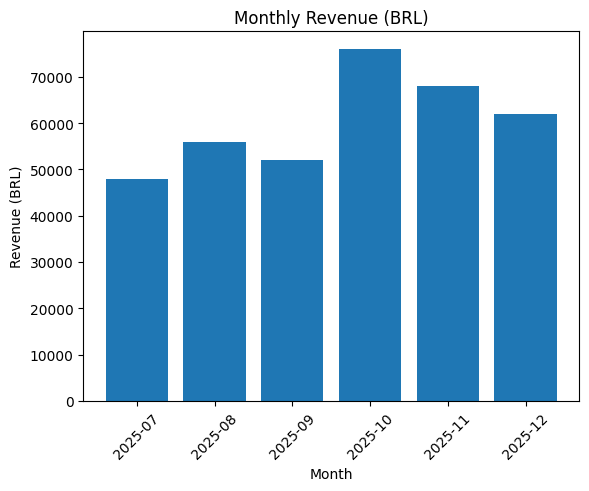

In [12]:
plt.figure()
plt.bar(df["month"], df["revenue_brl"])
plt.title("Monthly Revenue (BRL)")
plt.xlabel("Month")
plt.ylabel("Revenue (BRL)")
plt.xticks(rotation=45)
plt.show()

A receita flutua ao longo dos meses, indicando previsibilidade moderada e dependência potencial na execução de vendas e na qualidade do lead.

In [13]:
df["average_ticket_brl"] = df["revenue_brl"] / df["deals_closed"]

df[["month", "average_ticket_brl"]]

,month,average_ticket_brl
0,2025-07,4000.000000
1,2025-08,4000.000000
2,2025-09,4000.000000
3,2025-10,4222.222222
4,2025-11,4250.000000
5,2025-12,4133.333333


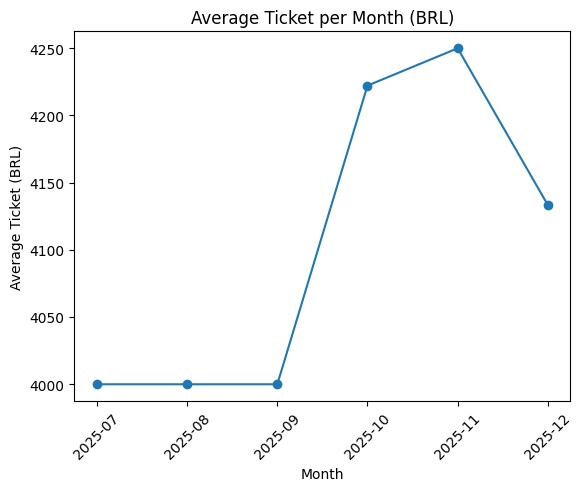

In [14]:
plt.figure()
plt.plot(df["month"], df["average_ticket_brl"], marker="o")
plt.title("Average Ticket per Month (BRL)")
plt.xlabel("Month")
plt.ylabel("Average Ticket (BRL)")
plt.xticks(rotation=45)
plt.show()

Variações no tíquete médio podem indicar mudanças no mix de produtos, na eficiência de vendas ou no foco da equipe de vendas.

In [15]:
df["cac_brl"] = df["traffic_investment_brl"] / df["deals_closed"]

df[["month", "cac_brl"]]

,month,cac_brl
0,2025-07,175.000000
1,2025-08,164.285714
2,2025-09,169.230769
3,2025-10,138.888889
4,2025-11,150.000000
5,2025-12,150.000000


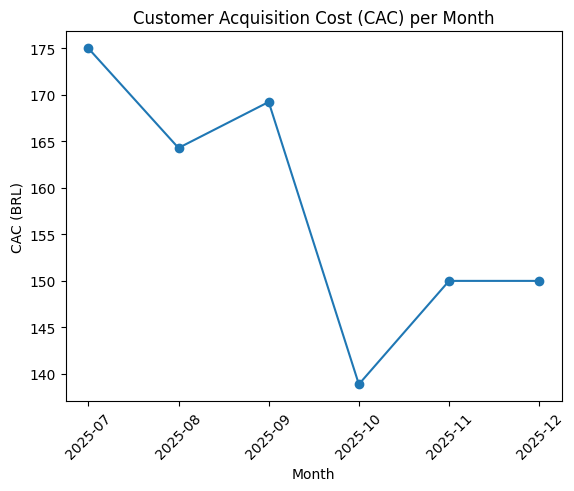

In [16]:
plt.figure()
plt.plot(df["month"], df["cac_brl"], marker="o")
plt.title("Customer Acquisition Cost (CAC) per Month")
plt.xlabel("Month")
plt.ylabel("CAC (BRL)")
plt.xticks(rotation=45)
plt.show()

A estabilidade do CAC sugere uma eficiência consistente da mídia, enquanto os picos podem indicar problemas de qualidade de leads ou conversão.

In [17]:
df["ticket_to_cac_ratio"] = df["average_ticket_brl"] / df["cac_brl"]

df[["month", "ticket_to_cac_ratio"]]

,month,ticket_to_cac_ratio
0,2025-07,22.857143
1,2025-08,24.347826
2,2025-09,23.636364
3,2025-10,30.400000
4,2025-11,28.333333
5,2025-12,27.555556


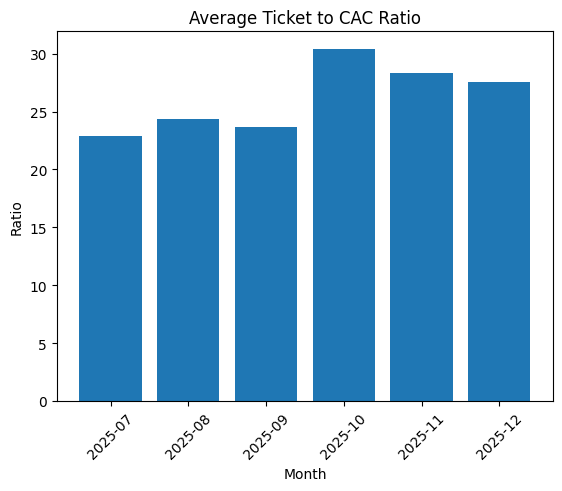

In [18]:
plt.figure()
plt.bar(df["month"], df["ticket_to_cac_ratio"])
plt.title("Average Ticket to CAC Ratio")
plt.xlabel("Month")
plt.ylabel("Ratio")
plt.xticks(rotation=45)
plt.show()

## Análise de Receita, CAC e Unit Economics

A análise das métricas de receita e eficiência de aquisição demonstra que a empresa possui uma operação comercial altamente saudável do ponto de vista de Unit Economics.

Ao longo do período analisado, o **ticket médio** manteve-se relativamente estável, com leve crescimento nos meses de maior volume de vendas. Esse comportamento indica que o crescimento da receita está sendo impulsionado principalmente pelo aumento do número de vendas, e não por variações significativas no mix de produtos ou estratégias de precificação.

O **Custo de Aquisição de Clientes (CAC)** apresentou valores consistentemente baixos para um modelo B2B de venda de treinamentos executivos, o que sugere boa qualidade dos leads gerados, alinhamento entre marketing e vendas e eficiência na estratégia de tráfego pago.

A relação entre **Ticket Médio e CAC** permaneceu muito acima dos benchmarks de mercado, indicando que, para cada real investido em aquisição, a empresa gera múltiplos significativos em receita. Esse cenário evidencia uma operação com forte potencial de escalabilidade e margens confortáveis.

De forma geral, os dados indicam que a empresa possui uma base sólida para crescimento, com eficiência na aquisição de clientes. No entanto, existe oportunidade estratégica para ampliar o ticket médio por meio de estratégias de upsell, cross-sell e maior foco na venda dos produtos de maior valor agregado, reduzindo a dependência do crescimento exclusivamente por volume.